# Analisis exploratorio de los Datos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

In [3]:
# Defino los paths de los archivos Excel
pipomessage_path = "tecnica_diego/obscure_pipomessage.xlsx"
user_path = "tecnica_diego/obscure_user.xlsx"
usermessage_path = "tecnica_diego/usermessage.xlsx"
symptoms_path = "tecnica_diego/obscure_symptoms.xlsx"

# Cargar los datos en pandas DataFrames
pipomessage_df = pd.read_excel(pipomessage_path)
user_df = pd.read_excel(user_path)
usermessage_df = pd.read_excel(usermessage_path)
symptoms_df = pd.read_excel(symptoms_path)

# Visualizar las primeras filas
pipomessage_df.head(), user_df.head(), usermessage_df.head(), symptoms_df.head()

(       id         patient                     creation_date body
 0  451982    883235090316  2023-06-02 13:31:51.360583+00:00    🌟
 1  490282  88674443816618  2023-06-12 13:08:50.123950+00:00  NaN
 2  490342   9932553318483  2023-06-12 13:15:18.707841+00:00  NaN
 3  490363  93349729602360  2023-06-12 13:17:03.154183+00:00  NaN
 4  490368  88664675181129  2023-06-12 13:17:28.927168+00:00  NaN,
      phone_number                     creation_date     cancer_type
 0    883888159324         2022-10-17 14:12:55+00:00             NaN
 1    883801795941  2023-01-31 13:08:09.590326+00:00  Cáncer de mama
 2    882996887778  2023-01-31 13:30:22.994697+00:00             NaN
 3    882872325922  2023-02-14 16:03:56.272810+00:00             NaN
 4  93349800196016         2022-11-21 14:28:46+00:00             NaN,
        id       patient                     creation_date  \
 0  142022  8.834444e+11  2023-03-23 14:55:52.409996+00:00   
 1    1657  8.826746e+11  2023-01-13 13:38:24.867173+00:00   
 2

## Analisis estadistico de los datos

### Analisis de la tabla: Obscure_user 

In [5]:
user_df.describe(include='all')

,phone_number,creation_date,cancer_type
count,2.035000e+03,2035,1409
unique,NaN,2030,523
top,NaN,2023-03-19 20:03:30.993201+00:00,Cáncer de Mama
freq,NaN,2,443
mean,3.506304e+13,NaN,NaN
std,4.218404e+13,NaN,NaN
min,5.993562e+10,NaN,NaN
25%,8.832703e+11,NaN,NaN
50%,9.243845e+12,NaN,NaN
75%,8.866457e+13,NaN,NaN


1. Se tiene 2035 entradas de usuarios pero solo hay 1409 entradas que incluyen tipo de cancer. Indica que existe entradas vacias.
2. El tipo de cáncer más comúnmente reportado es el Cancer de Mama que aparece 443 veces.

### Analisis de la tabla: Obscure_symptoms

In [7]:
symptoms_df.describe(include='all')

,id,user,creation_date,description,intensity
count,9872.000000,9.872000e+03,9872,9872,4301.000000
unique,NaN,NaN,9260,2049,NaN
top,NaN,NaN,2023-03-17 17:38:59.884970+00:00,dolor corporal,NaN
freq,NaN,NaN,3,816,NaN
mean,6895.750709,4.338532e+13,NaN,NaN,5.771216
std,4600.760922,4.376171e+13,NaN,NaN,3.496672
min,4.000000,9.099236e+10,NaN,NaN,0.000000
25%,3048.750000,8.833483e+11,NaN,NaN,4.000000
50%,5921.500000,9.743832e+12,NaN,NaN,6.000000
75%,11077.250000,8.868350e+13,NaN,NaN,8.000000


1. Se tiene 9872 sintomas registrados pero solo 4301 escribieron la intensidad de su sintoma
2. Se observa que el valor maximo de intensidad es 150, lo cual es contrario al maximo de intensidad de 10.
3. El síntoma más comúnmente reportado es el "dolor corporal"

### Analisis de la tabla: Obscure_Pipomessage

In [8]:
pipomessage_df.describe(include='all')

,id,patient,creation_date,body
count,126120.000000,1.261200e+05,126120,125409
unique,NaN,NaN,126115,68848
top,NaN,NaN,2023-06-26 00:02:58.251330+00:00,Notita 📝: Si encuentras algún error en nuestra...
freq,NaN,NaN,2,2658
mean,508938.061132,5.365313e+13,NaN,NaN
std,36415.700003,4.280557e+13,NaN,NaN
min,445873.000000,8.690737e+10,NaN,NaN
25%,477402.750000,8.837813e+11,NaN,NaN
50%,508932.500000,8.864519e+13,NaN,NaN
75%,540462.250000,8.869397e+13,NaN,NaN


1. Pipo ha enviado contenido en el mensaje 125409 veces. Pero creo 126120 registros. Entonces, algunos mensajes no tienen contenido.
2. El mensaje mas frecuente con 2658 veces enviado es: "Notita 📝: Si encuentras algún error en nuestra..." que parece es de PIPO que pregunta por feedback.

### Analisis de la tabla: Usermessage

In [9]:
usermessage_df.describe(include='all')

,id,patient,creation_date,body,local_time
count,249027.000000,2.490180e+05,249027,248827,223935
unique,NaN,NaN,247724,120372,222853
top,NaN,NaN,2022-12-05 20:10:46+00:00,Listo,2022-12-05 15:10:46-05:00
freq,NaN,NaN,4,12804,4
mean,130490.784618,2.649901e+15,NaN,NaN,NaN
std,74016.738558,7.307281e+16,NaN,NaN,NaN
min,460.000000,8.690737e+10,NaN,NaN,NaN
25%,69545.500000,8.832722e+11,NaN,NaN,NaN
50%,131978.000000,9.685945e+11,NaN,NaN,NaN
75%,194320.500000,8.866500e+13,NaN,NaN,NaN


1. Existen 248827 mensajes enviador por el usuario aunque se crearon 249027 registros. Entonces, existen tambien mensajes vacios en esta tabla.
2. El mensaje más común enviado por los usuarios es "Listo", el cual aparece 12804 veces.

### Continuando con el analisis, trataré de responder las siguientes preguntas:

1. ¿Cuántos tipos únicos de cáncer se han registrado en los datos?
2. ¿Cuántos síntomas únicos se han registrado en los datos y cuál es su 
    distribución de intensidad?

In [10]:
num_unique_cancer_types = user_df['cancer_type'].nunique()
num_unique_cancer_types

523

Hay 523 tipos únicos de cáncer registrados en los datos. Sin embargo, debemos revisar si existen textos que se refieren al mismo tipo de cancer y se esta contando como un tipo de cancer distinto

In [11]:
# Numero de sintomas unicos
num_unique_symptoms = symptoms_df['description'].nunique()

# Obtenemos la distribución de intensidad
symptom_intensity_distribution = symptoms_df['intensity'].value_counts().sort_index()


num_unique_symptoms

2049

Hay 2,049 síntomas únicos registrados en los datos. Revisar lo mismo con los sintomas unicos

In [12]:
from tabulate import tabulate

# Datos de ejemplo
col1 = symptom_intensity_distribution[:].index.to_numpy(dtype=int)
col2 = symptom_intensity_distribution.values
table = np.column_stack((col1, col2))
# Imprimir la tabla
tabla = tabulate(table, headers=["Intensidad", "Distribución"], tablefmt="fancy_grid")
print(tabla)


╒══════════════╤════════════════╕
│   Intensidad │   Distribución │
╞══════════════╪════════════════╡
│            0 │             19 │
├──────────────┼────────────────┤
│            1 │             80 │
├──────────────┼────────────────┤
│            2 │            355 │
├──────────────┼────────────────┤
│            3 │            527 │
├──────────────┼────────────────┤
│            4 │            461 │
├──────────────┼────────────────┤
│            5 │            652 │
├──────────────┼────────────────┤
│            6 │            483 │
├──────────────┼────────────────┤
│            7 │            523 │
├──────────────┼────────────────┤
│            8 │            617 │
├──────────────┼────────────────┤
│            9 │            294 │
├──────────────┼────────────────┤
│           10 │            276 │
├──────────────┼────────────────┤
│           11 │              5 │
├──────────────┼────────────────┤
│           12 │              1 │
├──────────────┼────────────────┤
│           13

### Anotacion
Parece que hay algunos valores de intensidad que están por encima de 10, el cual es el límite superior mencionado en el Caso. Estos podrían ser errores o valores atípicos en los datos.

## Graficas a presentar

### Distribución temporal de los mensajes y los registros de síntomas

In [14]:
# Convertimos la columna creation_date a datetime format
pipomessage_df['creation_date'] = pd.to_datetime(pipomessage_df['creation_date'], format='mixed')
usermessage_df['creation_date'] = pd.to_datetime(usermessage_df['creation_date'], format='mixed')
symptoms_df['creation_date'] = pd.to_datetime(symptoms_df['creation_date'], format='mixed')


# Creamos las columna date donde se guardara el dia de la fecha
pipomessage_df['date'] = pipomessage_df['creation_date'].dt.date
usermessage_df['date'] = usermessage_df['creation_date'].dt.date
symptoms_df['date'] = symptoms_df['creation_date'].dt.date

# Count the number of messages and symptom records by date
bot_message_count_by_date = pipomessage_df['date'].value_counts().sort_index()
user_message_count_by_date = usermessage_df['date'].value_counts().sort_index()
symptom_count_by_date = symptoms_df['date'].value_counts().sort_index()

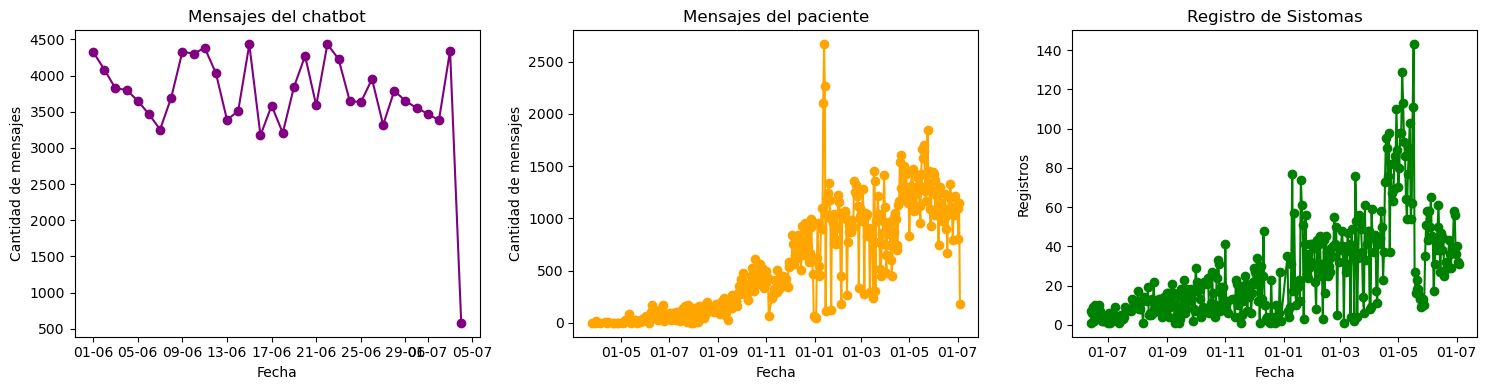

In [25]:
# Crear una figura y dos subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

# Graficar Mensajes de PIPO
bot_message_count_by_date.plot(ax=ax1, kind='line', marker='o', color='purple')

ax1.set_title('Mensajes del chatbot')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Cantidad de mensajes')

# Graficar Mensajes del PACIENTE
user_message_count_by_date.plot(ax=ax2, kind='line', marker='o', color='orange')

ax2.set_title('Mensajes del paciente')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Cantidad de mensajes')

# Graficar Registro de Sistomas
symptom_count_by_date.plot(ax=ax3, kind='line', marker='o',color='green')

ax3.set_title('Registro de Sistomas')
ax3.set_xlabel('Fecha')
ax3.set_ylabel('Registros')

# Ajustar las etiquetas del eje x
date_format = mdates.DateFormatter('%d-%m')
ax1.xaxis.set_major_formatter(date_format)
ax2.xaxis.set_major_formatter(date_format)
ax3.xaxis.set_major_formatter(date_format)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()

1. Mensajes del chatbot: los mensajes enviados por el chatbot se distribuyen desde el 1 de junio de 2023 hasta el 4 de julio de 2023, con un rango de 584 a 4432 mensajes por día.

2. Mensajes de los usuarios: los mensajes enviados por los usuarios se distribuyen desde el 25 de marzo de 2022 hasta el 4 de julio de 2023, con un rango de 2 a 1837 mensajes por día.

3. Registros de síntomas: los registros de síntomas se distribuyen desde el 13 de junio de 2022 hasta el 3 de julio de 2023, con un rango de 1 a 73 registros por día.

### Distribucion de las longitudes de los mensajes enviado por los usuarios a PIPO

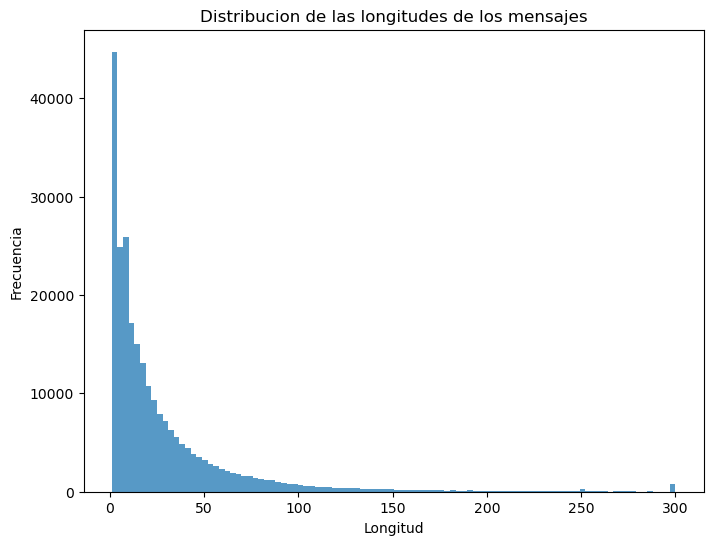

In [19]:
# Creamos una nueva columna con la longitud de los mensajes
usermessage_df['message_length'] = usermessage_df['body'].str.len()

# Graficamos un histograma
plt.figure(figsize=(8, 6))
plt.hist(usermessage_df['message_length'].dropna(), bins=100, alpha=0.75)
plt.title('Distribucion de las longitudes de los mensajes')
plt.xlabel('Longitud')
plt.ylabel('Frecuencia')
plt.show()

A partir de esta grafica, podemos observar que los mensajes tienen una longitud de menos de 300 caracteres y con una frecuencia mayor entre [0,50]. Esto nos dice que los usuarios prefieron mensajes cortos y que posiblemente hay una gran cantidad de mensajes vacios o con emojis.

### Distribucion de los tipos de cancer

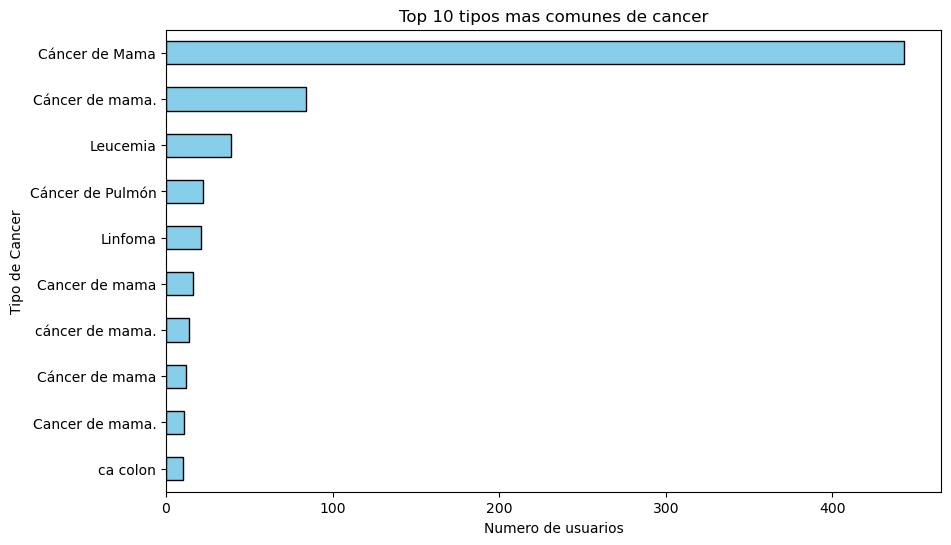

In [20]:
# Contemos cada tipo de cancer
cancer_type_counts = user_df['cancer_type'].value_counts()

# Grafiquemos los 10 tipos mas comunes
plt.figure(figsize=(10, 6))
cancer_type_counts[:10].plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Top 10 tipos mas comunes de cancer')
plt.xlabel('Numero de usuarios')
plt.ylabel('Tipo de Cancer')
plt.gca().invert_yaxis()
plt.show()


Esta grafica nos indica que el cancer de mama es el tipo de cancer mas comun y que debemos estandarizar el texto para no repetir tipos de cancer iguales. Esto se realiza en el preprocesamiento de la data

### Distribucion de los sintomas

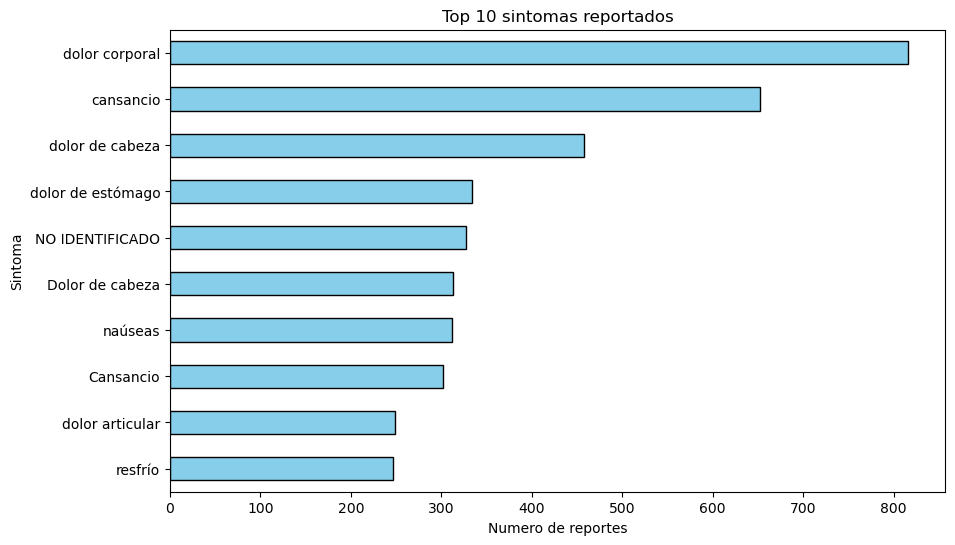

In [21]:
# Cuenta los sintomas
symptom_counts = symptoms_df['description'].value_counts()

# Graficamos el top 10 de mas frecuentes
plt.figure(figsize=(10, 6))
symptom_counts[:10].plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Top 10 sintomas reportados')
plt.xlabel('Numero de reportes')
plt.ylabel('Sintoma')
plt.gca().invert_yaxis()
plt.show()

Esta grafica indica que el dolor corporal es el sintoma mas comun pero tambien sufre del mismo problema de los datos anteriores.

### Intensidad de los sintomas reportados

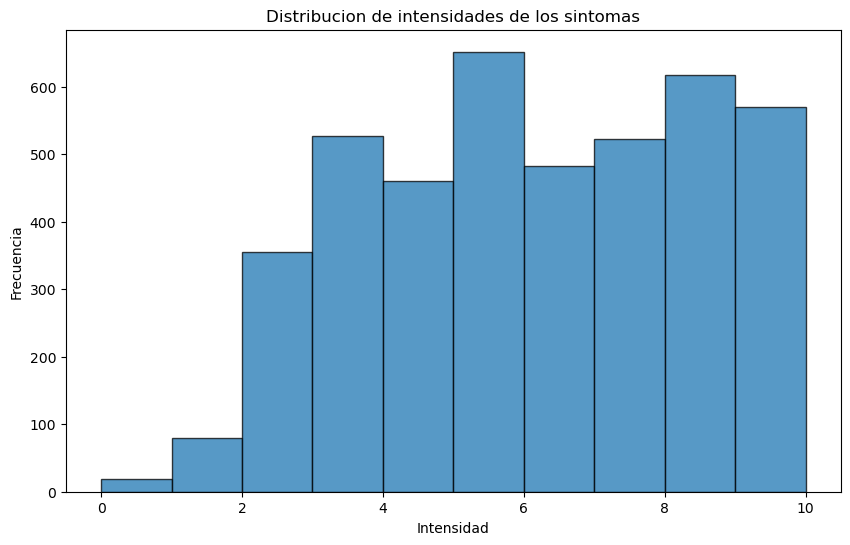

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(symptoms_df['intensity'].dropna(), bins=range(0, 11), alpha=0.75, edgecolor='black')
plt.title('Distribucion de intensidades de los sintomas')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.show()

Como se habia analizado anteriormente, las intensidades mas comunes son 3, 5 y 8.